<a href="https://colab.research.google.com/github/ashhabk/RFM-Analysis/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation**
by: Ashhab Karami

## Content
- Objective
- Data Gathering
- Code Preparation
- Raw Data Preparation
- Cleaning Data
- EDA
- Cluster Analysis

# **Objective**

**Indoapril** is the largest retail company in Wakanda since 2010 and is the first to integrate retail shopping experience between offline store and online website. With a lot of customer that shop in the Indoapril, Indoapril CMO have a hunch that **their marketing spend is overspending** because they always sent their marketing promotion to all of the customer.

However, he don't have any confidence on sending the marketing promotion to subgroup of the customer because he feels that if some customer doesn't get the promotion, some customer will be missing the promotion opportunity.

As **CMO Analyst**, we can conclude that the problem is: "*How can Indoapril create a marketing promotion such as that the promotion is maximized in each of the customer*"

One of the solution on this is creating **customer segmentation** so that every marketing effort is maximized and targeted.

# **Data Gathering**

The **data** is provided in google sheet [Customer Data](https://docs.google.com/spreadsheets/d/1yFKrZINbjcp3HrSwfcr5y2UX78k0y5DmUG1yXyJrDS0/edit#gid=0) which consist of **unique customer** that have already bought some item in Indoapril company from 2010 to 2020. The customer data consist of their demographic data and the summary of their transaction in Indoapril. The detail of the data definition can be seen below.

Data Definition:
- ID: Customer’s unique identifier
- Year_Birth: Customer's birth year
- Education: Education Qualification of customer
- Marital_Status: Marital Status of customer
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Recency: Number of days since customer's last purchase
- MntWines: Amount spent on wine
- MntFruits: Amount spent on fruit
- MntMeatProducts: Amount spent on meat
- MntFishProducts: Amount spent on fish
- MntSweetProducts: Amount spent on sweet goods
- MntGoldProds: Amount spent on gold
- NumWebPurchases: number of purchase using website
- NumCatalogPurchases: number of purchase using offline catalog
- NumStorePurchases: number of purchase using offline store
- NumDealsPurchases: number of purchase using deal discount
- NumWebVisitsMonth: number of visit to website
- Complain: customer is complaint or not

# **Code Preparation**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

# **Raw Data Preparation**

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1yFKrZINbjcp3HrSwfcr5y2UX78k0y5DmUG1yXyJrDS0/edit#gid=0'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,8,10,4,3,7,0
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,1,1,2,2,5,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,8,2,10,1,4,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,0,4,2,6,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,3,6,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,9,3,4,2,5,0
2236,4001,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,8,2,5,7,7,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,2,3,13,1,6,0
2238,8235,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,6,5,10,2,3,0


check data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

all data type are normal

First, change the Year_Birth to Age

In [ ]:
df['Age'] = 2021-df['Year_Birth']
df.drop('Year_Birth',axis=1,inplace=True)

In [ ]:
df['Complain'].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

In [ ]:
df

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,Complain,Age
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,8,10,4,3,7,0,64
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,1,1,2,2,5,0,67
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,8,2,10,1,4,0,56
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,0,4,2,6,0,37
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,3,6,5,5,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,9,3,4,2,5,0,54
2236,4001,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,8,2,5,7,7,0,75
2237,7270,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,2,3,13,1,6,0,40
2238,8235,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,6,5,10,2,3,0,65


Second, let's combine all amount spent and all purchases so we don't use a lot of variable

In [ ]:
df['Amount Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts']
+ df['MntFishProducts'] + df['MntSweetProducts']
+ df['MntGoldProds']
df['Total Purchase'] = df['NumWebPurchases'] + df['NumCatalogPurchases']
+ df['NumStorePurchases'] + df['NumDealsPurchases']
df.drop(['MntWines','MntFruits','MntMeatProducts','MntFishProducts',
         'MntSweetProducts','MntGoldProds','NumWebPurchases',
         'NumCatalogPurchases','NumStorePurchases',
         'NumDealsPurchases'],axis=1,inplace=True)

and combine Kidhome & Teenhome to Number_Child

In [ ]:
df["Children"]=df["Kidhome"]+df["Teenhome"]
df.drop(["Kidhome",'Teenhome'],axis=1,inplace=True)

In [ ]:
df

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Age,Amount Spent,Total Purchase,Children
0,5524,Graduation,Single,58138.0,58,7,0,64,1269,18,0
1,2174,Graduation,Single,46344.0,38,5,0,67,18,2,2
2,4141,Graduation,Together,71613.0,26,4,0,56,602,10,0
3,6182,Graduation,Together,26646.0,26,6,0,37,35,2,1
4,5324,PhD,Married,58293.0,94,5,0,40,334,8,1
...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,46,5,0,54,934,12,1
2236,4001,PhD,Together,64014.0,56,7,0,75,436,10,3
2237,7270,Graduation,Divorced,56981.0,91,6,0,40,1173,5,0
2238,8235,Master,Together,69245.0,8,3,0,65,672,11,1


# **Cleaning Data**

Cleaning Data:
- missing data
- typos
- duplicates
- outlier
- ~~string manipulation~~
- ~~timeseries manipulation~~
- ~~combining dataset~~

## missing data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Recency            2240 non-null   int64  
 5   NumWebVisitsMonth  2240 non-null   int64  
 6   Complain           2240 non-null   int64  
 7   Age                2240 non-null   int64  
 8   Amount Spent       2240 non-null   int64  
 9   Total Purchase     2240 non-null   int64  
 10  Children           2240 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 192.6+ KB


there are null data in income column (24 row / 1% of total) >> let's just delete it

In [ ]:
df.dropna(inplace=True)

let's check the data again

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2216 non-null   int64  
 1   Education          2216 non-null   object 
 2   Marital_Status     2216 non-null   object 
 3   Income             2216 non-null   float64
 4   Recency            2216 non-null   int64  
 5   NumWebVisitsMonth  2216 non-null   int64  
 6   Complain           2216 non-null   int64  
 7   Age                2216 non-null   int64  
 8   Amount Spent       2216 non-null   int64  
 9   Total Purchase     2216 non-null   int64  
 10  Children           2216 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 207.8+ KB


## typos

In [ ]:
for i in df.columns:
  unique_data = df[i].value_counts()
  print(unique_data,'\n')

5524    1
6885    1
3478    1
7494    1
1763    1
       ..
7235    1
3560    1
5278    1
7761    1
9405    1
Name: ID, Length: 2216, dtype: int64 

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

7500.0     12
35860.0     4
37760.0     3
83844.0     3
63841.0     3
           ..
40760.0     1
41452.0     1
6835.0      1
33622.0     1
52869.0     1
Name: Income, Length: 1974, dtype: int64 

56    37
30    32
54    32
46    31
92    30
      ..
41    15
59    14
22    13
7     12
44    11
Name: Recency, Length: 100, dtype: int64 

7     387
8     340
6     335
5     279
4     217
3     203
2     201
1     150
9      82
0      10
20      3
10      3
14      2
19      2
17      1
13      1
Name: NumWebVisitsMonth, dtype: int64 

0    2195
1      21


summary:
- marital status Alone, YOLO, Absurb is useless >> let's just delete it
- complain column is useless (only 21 row have complain) >> let's just drop it

In [ ]:
df = df[~df['Marital_Status'].isin(['Alone','YOLO','Absurb'])]

In [ ]:
df.drop('Complain',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Age,Amount Spent,Total Purchase,Children
0,5524,Graduation,Single,58138.0,58,7,64,1269,18,0
1,2174,Graduation,Single,46344.0,38,5,67,18,2,2
2,4141,Graduation,Together,71613.0,26,4,56,602,10,0
3,6182,Graduation,Together,26646.0,26,6,37,35,2,1
4,5324,PhD,Married,58293.0,94,5,40,334,8,1
...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,46,5,54,934,12,1
2236,4001,PhD,Together,64014.0,56,7,75,436,10,3
2237,7270,Graduation,Divorced,56981.0,91,6,40,1173,5,0
2238,8235,Master,Together,69245.0,8,3,65,672,11,1


Also, we need to check if there are some un-logical number such as have amount spent zero but have total purchase and vice versa

In [ ]:
filter_amount = df['Amount Spent']==0
filter_purchase = df['Total Purchase']==0
print(df[filter_amount|filter_purchase])

         ID   Education Marital_Status    Income  Recency  NumWebVisitsMonth  \
42     8430  Graduation       Together   21994.0        4                  5   
78    10401    2n Cycle       Together   26326.0       12                  3   
157    9283  Graduation         Single   60199.0       49                  4   
178   10492  Graduation       Together   38285.0       96                  2   
294   10451  Graduation       Together   29672.0        6                  6   
381    9543  Graduation        Married   19986.0       74                  7   
442    5029  Graduation        Married   18100.0       14                  5   
617    1503         PhD       Together  162397.0       31                  1   
655    5555  Graduation       Divorced  153924.0       81                  0   
661    7093  Graduation        Married   19986.0       74                  7   
730    5329         PhD       Divorced   35946.0       24                  5   
774    4303         PhD       Together  

There are 37 row that have un-logical data, so let's delete it.

In [ ]:
df = df[~(filter_amount|filter_purchase)]

## duplicates

In [ ]:
df[df.duplicated()]

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Age,Amount Spent,Total Purchase,Children


## outlier

In [ ]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Recency',
       'NumWebVisitsMonth', 'Age', 'Amount Spent', 'Total Purchase',
       'Children'],
      dtype='object')

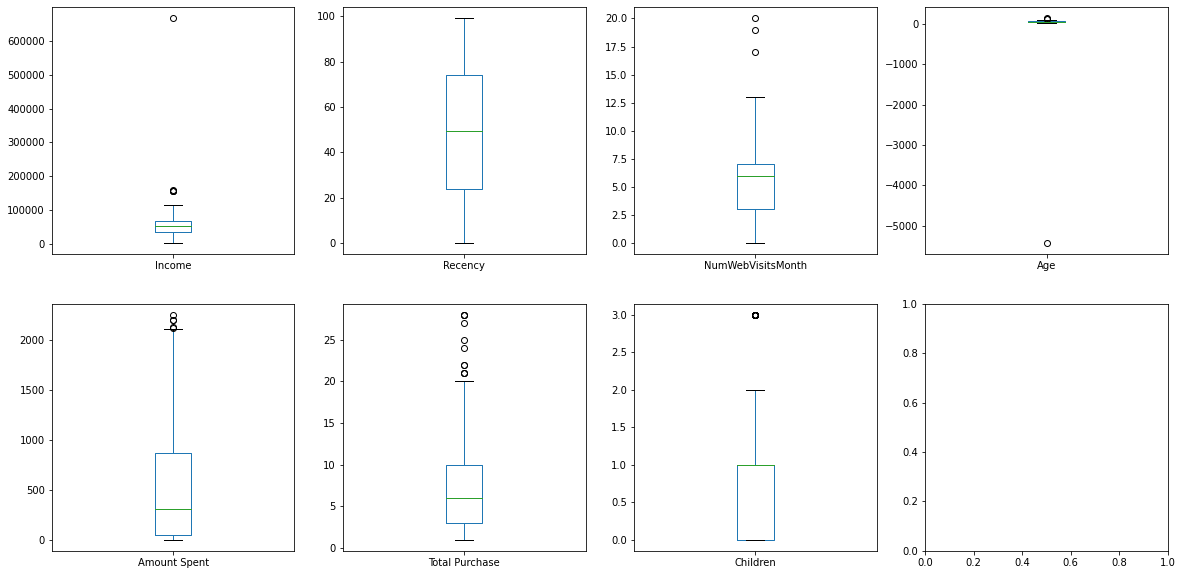

In [ ]:
numerical_column = ['Income', 'Recency',
       'NumWebVisitsMonth', 'Age', 'Amount Spent', 'Total Purchase',
       'Children']

fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = df.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

let's only delete the biggest outlier in: income, age, children

biggest = far away from Max

assume the smaller outlier is noise

In [ ]:
df = df[(df['Income']<600000)]
df = df[(df['Age']<90)]
df = df[(df['Children']<2.5)]
df

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Age,Amount Spent,Total Purchase,Children
0,5524,Graduation,Single,58138.0,58,7,64,1269,18,0
1,2174,Graduation,Single,46344.0,38,5,67,18,2,2
2,4141,Graduation,Together,71613.0,26,4,56,602,10,0
3,6182,Graduation,Together,26646.0,26,6,37,35,2,1
4,5324,PhD,Married,58293.0,94,5,40,334,8,1
...,...,...,...,...,...,...,...,...,...,...
2234,8372,Graduation,Married,34421.0,81,7,47,13,1,1
2235,10870,Graduation,Married,61223.0,46,5,54,934,12,1
2237,7270,Graduation,Divorced,56981.0,91,6,40,1173,5,0
2238,8235,Master,Together,69245.0,8,3,65,672,11,1


# **EDA**

Exploring Data:
- summary data overview
- categorical encoding
- standardize the data

First, let's see the summary of the clean dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2124 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2124 non-null   int64  
 1   Education          2124 non-null   object 
 2   Marital_Status     2124 non-null   object 
 3   Income             2124 non-null   float64
 4   Recency            2124 non-null   int64  
 5   NumWebVisitsMonth  2124 non-null   int64  
 6   Age                2124 non-null   int64  
 7   Amount Spent       2124 non-null   int64  
 8   Total Purchase     2124 non-null   int64  
 9   Children           2124 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 182.5+ KB


In [ ]:
df[numerical_column].describe()

,Income,Recency,NumWebVisitsMonth,Age,Amount Spent,Total Purchase,Children
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000
mean,52345.115348,49.046610,5.274482,49.366761,513.050377,6.934557,0.899247
std,21143.208031,28.839808,2.369235,119.416069,523.354462,4.688201,0.687154
min,2447.000000,0.000000,0.000000,-5425.000000,1.000000,1.000000,0.000000
25%,35782.250000,24.000000,3.000000,43.000000,47.750000,3.000000,0.000000
50%,52196.500000,49.000000,6.000000,51.000000,322.000000,7.000000,1.000000
75%,69087.000000,74.000000,7.000000,61.000000,873.500000,10.000000,1.000000
max,160803.000000,99.000000,20.000000,81.000000,2246.000000,28.000000,2.000000


In [ ]:
df[['Education', 'Marital_Status']].describe()

,Education,Marital_Status
count,2124,2124
unique,5,6
top,Graduation,Married
freq,1074,827


Data Overview:
- There are **2.124** user in the clean dataset
- Mean income of Indoapril user is **52.345** with median age **51 years old**
- Most of the user have only **1 child** with maximum child is 2
- Most of the user is **graduate people** and have been **married**

Let's copy the dataframe so the original number still be in the dataframe

In [ ]:
df_cluster = df.copy()

As the Clustering method need to use numbers, let's change categorical column to to number which Education column will be using label encoding (ordinal) & Marital_Status will be using one-hot encoding

In [ ]:
df_cluster['Education'] = df_cluster['Education'].astype('category')
df_cluster['Education_Category'] = df_cluster['Education'].cat.codes

In [ ]:
dum_df = pd.get_dummies(df_cluster, columns=["Marital_Status"], prefix=["Marital_Status"])
df_cluster = df_cluster.merge(dum_df)
df_cluster

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Age,Amount Spent,Total Purchase,Children,Education_Category,Marital_Status_Absurd,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,Graduation,Single,58138.0,58,7,64,1269,18,0,2,0,0,0,1,0,0
1,2174,Graduation,Single,46344.0,38,5,67,18,2,2,2,0,0,0,1,0,0
2,4141,Graduation,Together,71613.0,26,4,56,602,10,0,2,0,0,0,0,1,0
3,6182,Graduation,Together,26646.0,26,6,37,35,2,1,2,0,0,0,0,1,0
4,5324,PhD,Married,58293.0,94,5,40,334,8,1,4,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,8372,Graduation,Married,34421.0,81,7,47,13,1,1,2,0,0,1,0,0,0
2120,10870,Graduation,Married,61223.0,46,5,54,934,12,1,2,0,0,1,0,0,0
2121,7270,Graduation,Divorced,56981.0,91,6,40,1173,5,0,2,0,1,0,0,0,0
2122,8235,Master,Together,69245.0,8,3,65,672,11,1,3,0,0,0,0,1,0


Because the numeric column have different scale, we need to scale it so all numeric feature have diference importance

In [ ]:
scaler = MinMaxScaler()
df_cluster[numerical_column] = scaler.fit_transform(df_cluster[numerical_column])
df_cluster

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Age,Amount Spent,Total Purchase,Children,Education_Category,Marital_Status_Absurd,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,Graduation,Single,0.351682,0.585859,0.35,0.996912,0.564811,0.629630,0.0,2,0,0,0,1,0,0
1,2174,Graduation,Single,0.277205,0.383838,0.25,0.997457,0.007572,0.037037,1.0,2,0,0,0,1,0,0
2,4141,Graduation,Together,0.436775,0.262626,0.20,0.995459,0.267706,0.333333,0.0,2,0,0,0,0,1,0
3,6182,Graduation,Together,0.152814,0.262626,0.30,0.992009,0.015145,0.037037,0.5,2,0,0,0,0,1,0
4,5324,PhD,Married,0.352661,0.949495,0.25,0.992554,0.148330,0.259259,0.5,4,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,8372,Graduation,Married,0.201912,0.818182,0.35,0.993825,0.005345,0.000000,0.5,2,0,0,1,0,0,0
2120,10870,Graduation,Married,0.371164,0.464646,0.25,0.995096,0.415590,0.407407,0.5,2,0,0,1,0,0,0
2121,7270,Graduation,Divorced,0.344376,0.919192,0.30,0.992554,0.522049,0.148148,0.0,2,0,1,0,0,0,0
2122,8235,Master,Together,0.421822,0.080808,0.15,0.997094,0.298886,0.370370,0.5,3,0,0,0,0,1,0


# **Cluster Analysis**

Cluster Analysis:
  - determine cluster number
    - elbow method
    - silhoutte analysis
  - create cluster
  - check agg for each cluster
  - naming

Let's drop the column that are not needed first

In [ ]:
df_cluster = df_cluster.drop(['ID','Marital_Status','Education'],axis=1)

Let's create a cluster range that make sense for business which from 2 to 10

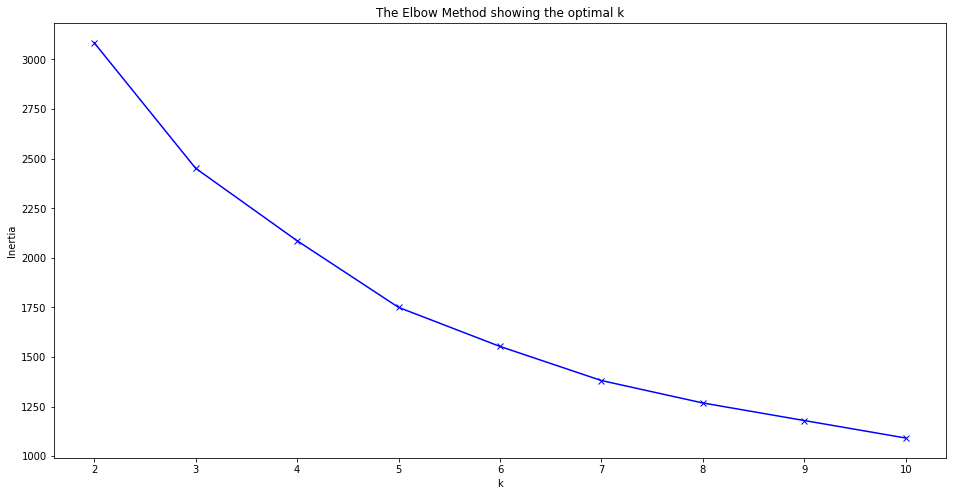

In [ ]:
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.31736422993627805
For n_clusters = 3 The average silhouette_score is : 0.31480441773207507
For n_clusters = 4 The average silhouette_score is : 0.290411524595707
For n_clusters = 5 The average silhouette_score is : 0.3455014162380747
For n_clusters = 6 The average silhouette_score is : 0.3416778224242534
For n_clusters = 7 The average silhouette_score is : 0.36851132499405576
For n_clusters = 8 The average silhouette_score is : 0.39437055655811154
For n_clusters = 9 The average silhouette_score is : 0.41163497460289633
For n_clusters = 10 The average silhouette_score is : 0.40039950521304585


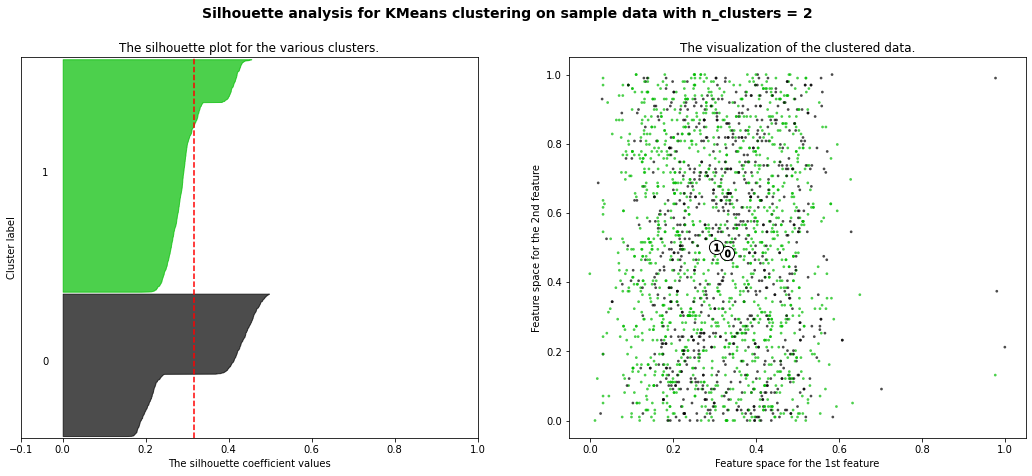

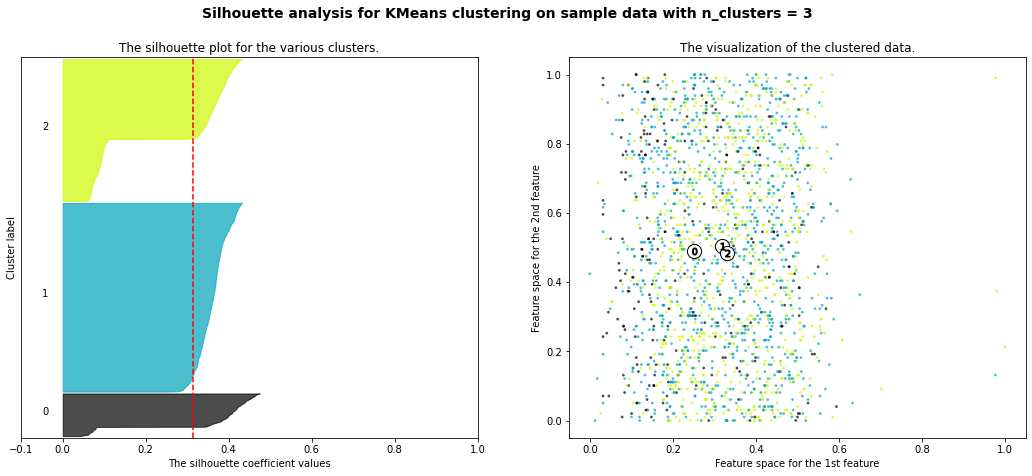

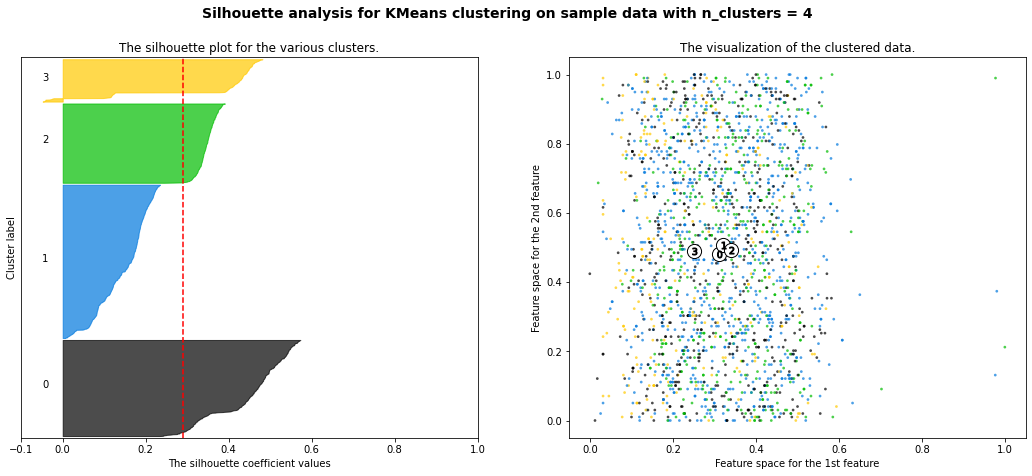

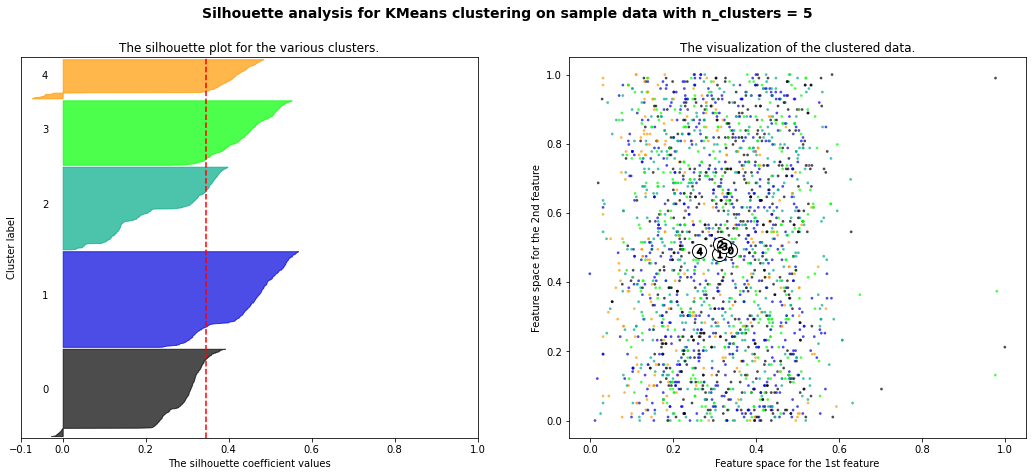

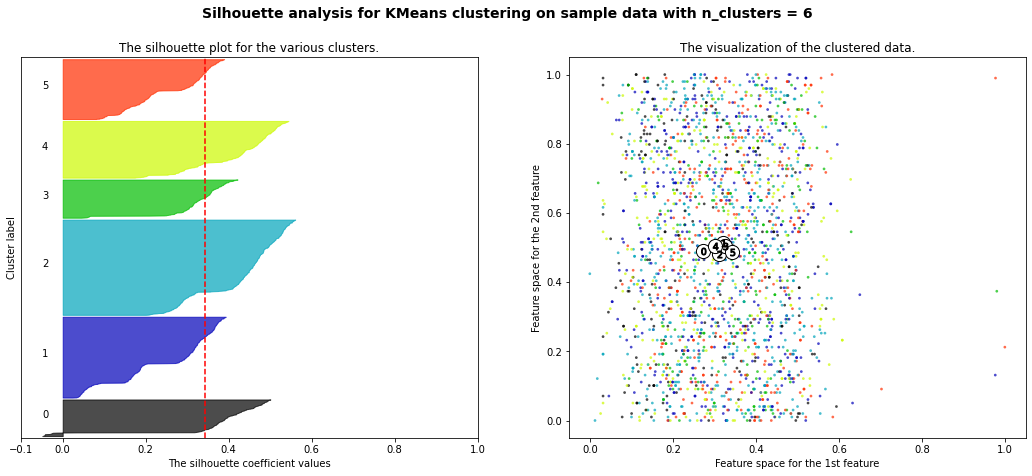

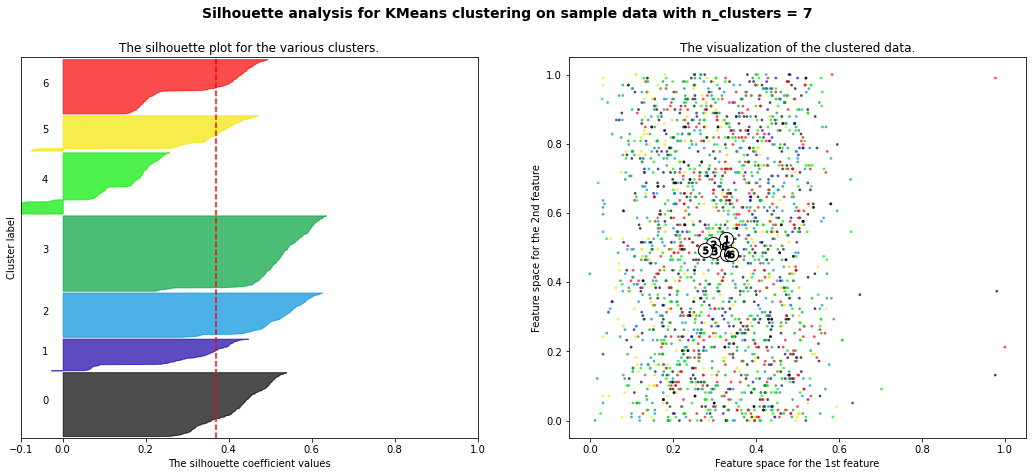

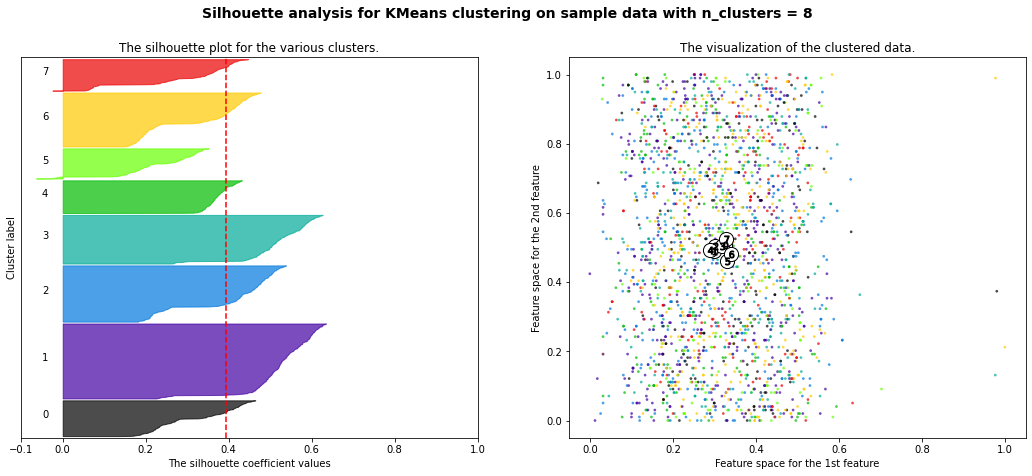

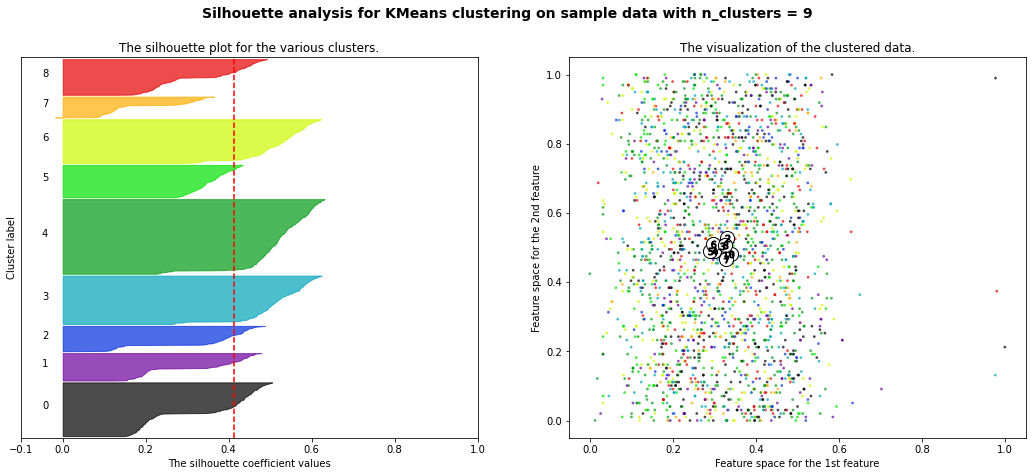

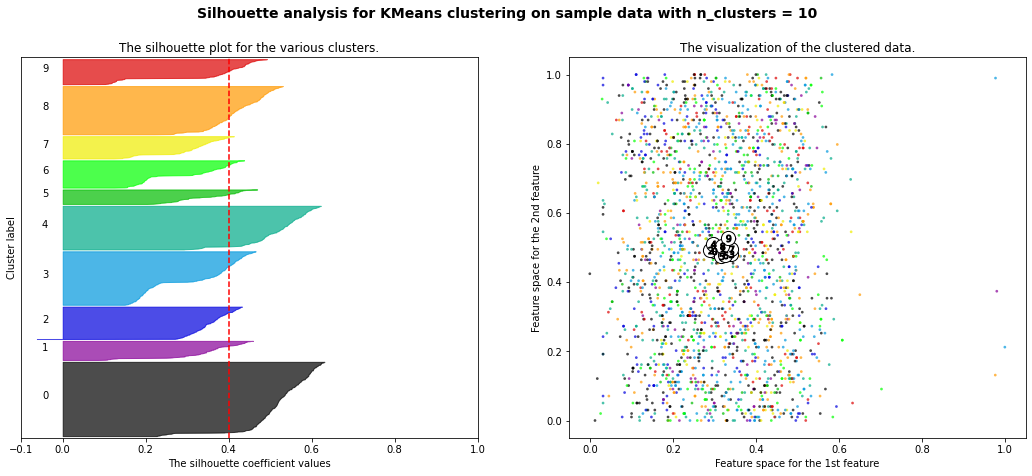

In [ ]:
from silhoutte import silhoutte_analysis
silhoutte_analysis(df_cluster,list(range(2,11)))

based on elbow method and silhoutte analysis above, we can choose cluster = 8

In [ ]:
cluster_model = cluster.KMeans(n_clusters=8)
cluster_model.fit(df_cluster)
cluster_label = cluster_model.labels_
df['cluster'] = cluster_label
df

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Age,Amount Spent,Total Purchase,Children,cluster
0,5524,Graduation,Single,58138.0,58,7,64,1269,18,0,5
1,2174,Graduation,Single,46344.0,38,5,67,18,2,2,5
2,4141,Graduation,Together,71613.0,26,4,56,602,10,0,0
3,6182,Graduation,Together,26646.0,26,6,37,35,2,1,0
4,5324,PhD,Married,58293.0,94,5,40,334,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,Graduation,Married,34421.0,81,7,47,13,1,1,7
2235,10870,Graduation,Married,61223.0,46,5,54,934,12,1,7
2237,7270,Graduation,Divorced,56981.0,91,6,40,1173,5,0,4
2238,8235,Master,Together,69245.0,8,3,65,672,11,1,6


In [ ]:
df.groupby(['cluster','Education','Marital_Status'])['Income'].agg(['count','mean','median','max','min'])

count          mean   median       max  \
cluster Education  Marital_Status                                           
0       Basic      Together           14  21240.071429  23179.0   28389.0   
        Graduation Together          270  54386.722222  54296.0  157146.0   
1       Master     Married           133  53666.428571  53204.0   92163.0   
        PhD        Married           182  58231.093407  57163.5  160803.0   
2       2n Cycle   Divorced           21  51809.523810  59052.0   87305.0   
                   Married            75  47003.466667  46891.0   96547.0   
                   Single             34  53526.029412  46856.0   89572.0   
                   Together           55  45071.145455  46344.0   92556.0   
                   Widow               5  51392.200000  47682.0   74859.0   
        Basic      Widow               1  22123.000000  22123.0   22123.0   
3       Master     Absurd              1  65487.000000  65487.0   65487.0   
                   Single             71  54288.309859  50014.0   98777.0   
                   Widow              11  58401.545455  51529.0   84953.0   
        PhD        Divorced           50  53600.120000  52426.5   90687.0   
                   Single             90  53653.355556  50935.0  113734.0   
                   Widow              24  60288.083333  57032.0   82571.0   
4       Basic      Divorced            1   9548.000000   9548.0    9548.0   
        Graduation Absurd              1  79244.000000  79244.0   79244.0   
                   Divorced          111  55442.621622  57136.0  102692.0   
                   Widow              35  54976.657143  58275.0   85620.0   
        Master     Divorced           36  50640.388889  50755.0   81380.0   
5       Basic      Single             17  18336.176471  16185.0   26868.0   
        Graduation Single            240  51508.104167  49973.5  101970.0   
6       Master     Together          101  52216.277228  49854.0  157733.0   
        PhD        Together          108  55372.453704  56567.0  102160.0   
7       Basic      Married            20  21960.500000  22352.0   34445.0   
        Graduation Married           417  51312.273381  51479.0   94642.0   

                                       min  
cluster Education  Marital_Status           
0       Basic      Together         9722.0  
        Graduation Together        13672.0  
1       Master     Married          7500.0  
        PhD        Married         16927.0  
2       2n Cycle   Divorced        13533.0  
                   Married          7500.0  
                   Single          23331.0  
                   Together         7500.0  
                   Widow           28457.0  
        Basic      Widow           22123.0  
3       Master     Absurd          65487.0  
                   Single           6560.0  
                   Widow           33051.0  
        PhD        Divorced        14849.0  
                   Single           7144.0  
                   Widow           25358.0  
4       Basic      Divorced         9548.0  
        Graduation Absurd          79244.0  
                   Divorced        12571.0  
                   Widow           27038.0  
        Master     Divorced        10979.0  
5       Basic      Single           7500.0  
        Graduation Single           7500.0  
6       Master     Together        14661.0  
        PhD        Together         5648.0  
7       Basic      Married          7500.0  
        Graduation Married          2447.0

In [ ]:
df.groupby(['cluster','Education','Marital_Status'])['Amount Spent'].agg(['count','mean','median','max','min'])

count        mean  median   max  min
cluster Education  Marital_Status                                      
0       Basic      Together           14   18.857143    14.0    43    5
        Graduation Together          270  555.585185   382.0  2246    7
1       Master     Married           133  495.240602   338.0  1959   12
        PhD        Married           182  662.609890   482.0  2117   12
2       2n Cycle   Divorced           21  576.285714   578.0  1497   14
                   Married            75  323.333333    78.0  1455    9
                   Single             34  454.117647   200.0  1686    9
                   Together           55  336.672727   144.0  1834    8
                   Widow               5  461.600000   306.0  1257   16
        Basic      Widow               1   30.000000    30.0    30   30
3       Master     Absurd              1  807.000000   807.0   807  807
                   Single             71  676.521127   354.0  2191   10
                   Widow              11  654.545455   439.0  1586   88
        PhD        Divorced           50  562.760000   483.0  1721   11
                   Single             90  571.744444   413.0  1839    9
                   Widow              24  683.500000   787.0  1606   24
4       Basic      Divorced            1    4.000000     4.0     4    4
        Graduation Absurd              1  698.000000   698.0   698  698
                   Divorced          111  531.027027   448.0  1650    1
                   Widow              35  527.628571   452.0  1719   10
        Master     Divorced           36  470.527778   225.5  1567   22
5       Basic      Single             17   20.588235    21.0    49    1
        Graduation Single            240  496.408333   312.0  2101    8
6       Master     Together          101  478.594059   296.0  2063    6
        PhD        Together          108  589.925926   427.5  2043    8
7       Basic      Married            20   47.650000    20.5   472    1
        Graduation Married           417  481.429257   307.0  2124    5

In [ ]:
df.groupby(['cluster','Education','Marital_Status'])['Total Purchase'].agg(['count','mean','median','max','min'])

count       mean  median  max  min
cluster Education  Marital_Status                                    
0       Basic      Together           14   1.785714     1.5    4    1
        Graduation Together          270   7.392593     7.5   28    1
1       Master     Married           133   6.578947     7.0   18    1
        PhD        Married           182   7.950549     7.5   28    1
2       2n Cycle   Divorced           21   7.619048     8.0   17    1
                   Married            75   5.920000     4.0   20    1
                   Single             34   6.411765     5.0   21    1
                   Together           55   6.363636     4.0   19    1
                   Widow               5   7.200000     7.0   12    1
        Basic      Widow               1   3.000000     3.0    3    3
3       Master     Absurd              1   8.000000     8.0    8    8
                   Single             71   6.633803     6.0   16    1
                   Widow              11   9.000000    10.0   15    4
        PhD        Divorced           50   7.420000     7.0   17    1
                   Single             90   7.155556     7.0   27    1
                   Widow              24   8.833333     9.0   19    1
4       Basic      Divorced            1   1.000000     1.0    1    1
        Graduation Absurd              1  14.000000    14.0   14   14
                   Divorced          111   7.396396     7.0   17    1
                   Widow              35   7.200000     7.0   16    1
        Master     Divorced           36   6.944444     6.0   18    2
5       Basic      Single             17   2.470588     2.0    5    1
        Graduation Single            240   6.795833     7.0   20    1
6       Master     Together          101   6.514851     7.0   15    1
        PhD        Together          108   7.231481     8.0   18    1
7       Basic      Married            20   2.850000     2.0   13    1
        Graduation Married           417   6.865707     6.0   28    1

In [ ]:
df.groupby(['cluster','Education','Marital_Status'])['Age'].agg(['count','mean','median','max','min'])

count       mean  median  max   min
cluster Education  Marital_Status                                     
0       Basic      Together           14  50.285714    48.0   74    33
        Graduation Together          270  52.570370    52.0   75    27
1       Master     Married           133  53.721805    51.0   78    33
        PhD        Married           182  53.395604    51.0   80    31
2       2n Cycle   Divorced           21  53.952381    56.0   69    33
                   Married            75  47.880000    47.0   74    25
                   Single             34  44.823529    41.5   69    26
                   Together           55  47.600000    45.0   71    30
                   Widow               5  61.600000    61.0   72    46
        Basic      Widow               1  61.000000    61.0   61    61
3       Master     Absurd              1  64.000000    64.0   64    64
                   Single             71  49.661972    50.0   78    29
                   Widow              11  67.272727    70.0   77    52
        PhD        Divorced           50  55.980000    56.0   78    38
                   Single             90  52.211111    50.0   81    30
                   Widow              24  65.500000    65.0   78    50
4       Basic      Divorced            1  45.000000    45.0   45    45
        Graduation Absurd              1  28.000000    28.0   28    28
                   Divorced          111  53.864865    53.0   72    34
                   Widow              35  58.542857    57.0   76    43
        Master     Divorced           36  53.500000    53.0   72    32
5       Basic      Single             17  38.235294    35.0   63    29
        Graduation Single            240  49.000000    49.5   74    26
6       Master     Together          101   1.356436    56.0   76 -5425
        PhD        Together          108  54.851852    54.5   76    30
7       Basic      Married            20  42.750000    41.0   70    25
        Graduation Married           417  50.613909    49.0   77    29

In [ ]:
df.groupby('cluster')['ID'].agg(['count'])

,count
cluster,
0,284
1,315
2,191
3,247
4,184
5,257
6,209
7,437


Summary:
- the distribution of data on each cluster quite good (no cluster with small count)
- cluster characteristic:
  - 0: single, mostly graduate >> can be named: "Single Graduate"
  - 1: PhD >> can be named: "High Educated People"
  - 2: married >> can be named: "Married Family"